In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardio/cardio.csv


In [2]:
###     Importing All Libraries Needed For Buiding The Model 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
###  Creating Dataframe From Dataset -  " FRAMINGHAM CARDIOVASCULAR DISEASE DATASET "

df = pd.read_csv('/kaggle/input/cardio/cardio.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [4]:
###  Exploratory Data Anaysis (EDA)

In [5]:
#  Information about Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [6]:
# Size of Dataset
df.size

67808

In [7]:
# Shape of Dataset
df.shape

(4238, 16)

In [8]:
# Describing the Dataset
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
# Datatypes in dataset
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [10]:
# Calculating Number of Null in each columns
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
# Now Dropping all those rows in which contain even one Null value.

df.dropna(subset=['education'], inplace=True)
df.dropna(subset=['cigsPerDay'], inplace=True)
df.dropna(subset=['BPMeds'], inplace=True)
df.dropna(subset=['totChol'], inplace=True)
df.dropna(subset=['BMI'], inplace=True)
df.dropna(subset=['heartRate'], inplace=True)
df.dropna(subset=['glucose'], inplace=True)

In [12]:
# Calculating again number of Null in Dataset to verify.

df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [13]:
# Now Modified Dataset Shape.
df.shape

(3656, 16)

In [14]:
### Visualization

Text(0.5, 1.0, 'Distribution of Age')

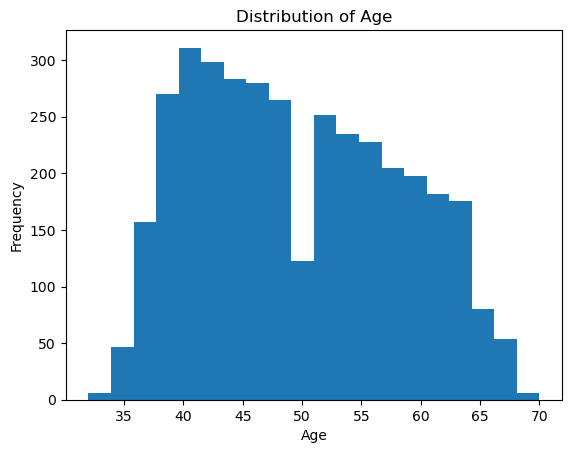

In [15]:
# Histogram for age
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

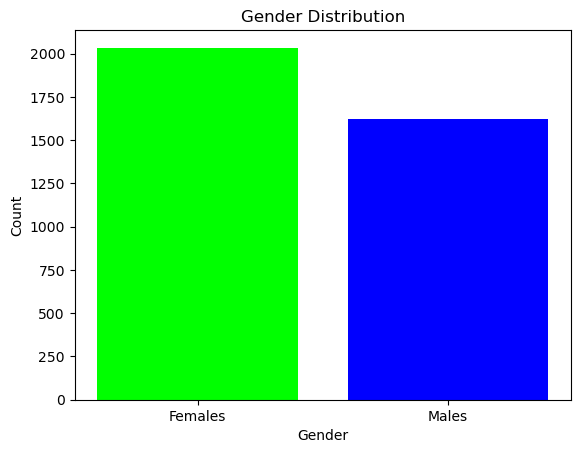

In [16]:
# Barchart for Gender
x = ["Females","Males"]
m = w = 0
for i in df['male']:
    if i==0:
        w+=1
    else:
        m+=1
y = [w,m]

plt.bar(x,y,color=['lime','blue'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

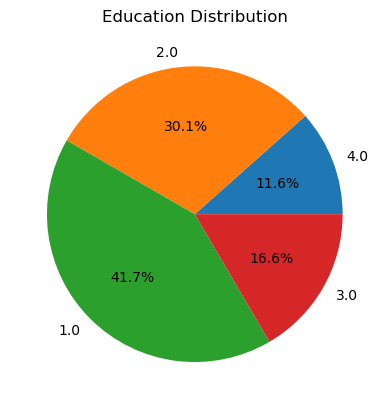

In [17]:
# Pie Chart for Education Distribution
labels = df['education'].unique()
size = df.groupby('education',sort=False).size()
plt.pie(size,labels=labels,autopct='%1.1f%%')
plt.title("Education Distribution")
plt.show()

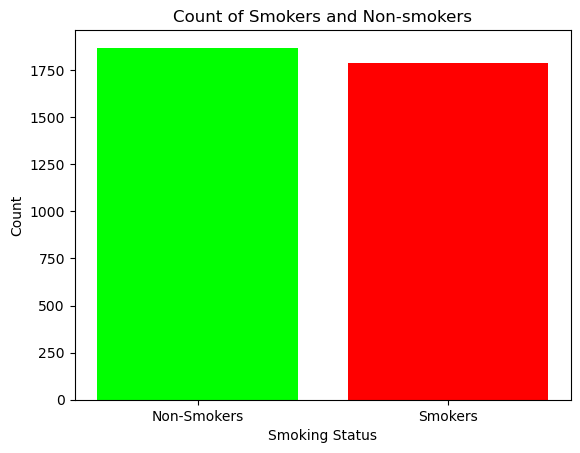

In [18]:
# Barchart for Smoking Status
x = ["Non-Smokers","Smokers"]
ns = s = 0
for i in df['currentSmoker']:
    if i==0:
        ns+=1
    else:
        s+=1
y = [ns,s]

plt.bar(x,y,color=['lime','red'])
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Count of Smokers and Non-smokers")
plt.show()

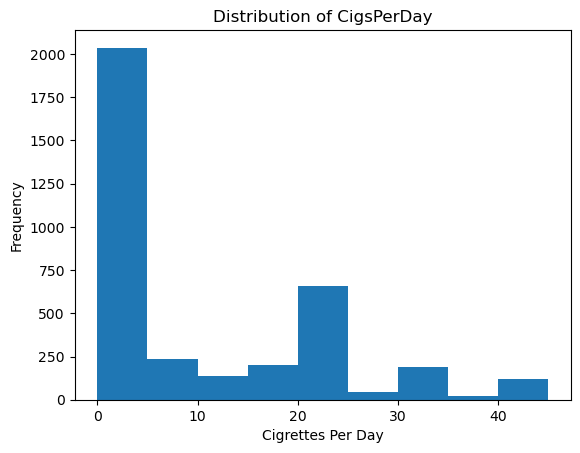

In [19]:
# Histogram for Cigrettes per day
plt.hist(df['cigsPerDay'],bins = [0,5,10,15,20,25,30,35,40,45])
plt.xlabel('Cigrettes Per Day')
plt.ylabel('Frequency')
plt.title('Distribution of CigsPerDay')
plt.show()

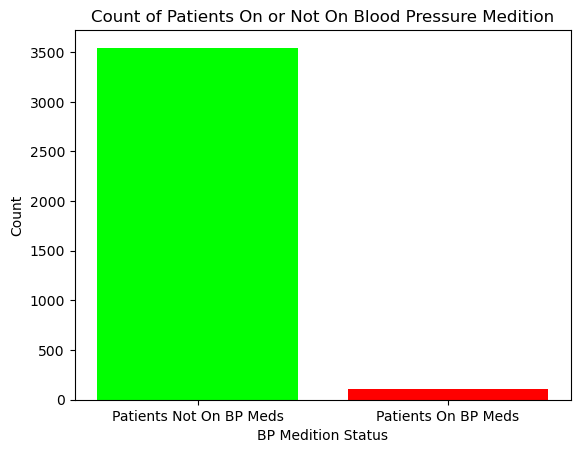

In [20]:
# Barchart for Blood Pressure Medition
x = ["Patients Not On BP Meds","Patients On BP Meds"]
nbm = bm = 0
for i in df['BPMeds']:
    if i==0:
        nbm+=1
    else:
        bm+=1
y = [nbm,bm]

plt.bar(x,y,color=['lime','red'])
plt.xlabel("BP Medition Status")
plt.ylabel("Count")
plt.title("Count of Patients On or Not On Blood Pressure Medition")
plt.show()

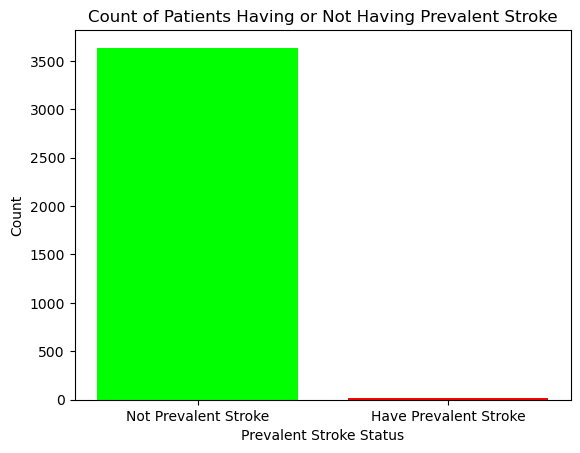

In [21]:
# Barchart for Patients Having Prevalent Stroke
x = ["Not Prevalent Stroke","Have Prevalent Stroke"]
nps = ps = 0
for i in df['prevalentStroke']:
    if i==0:
        nps+=1
    else:
        ps+=1
y = [nps,ps]

plt.bar(x,y,color=['lime','red'])
plt.xlabel("Prevalent Stroke Status")
plt.ylabel("Count")
plt.title("Count of Patients Having or Not Having Prevalent Stroke")
plt.show()

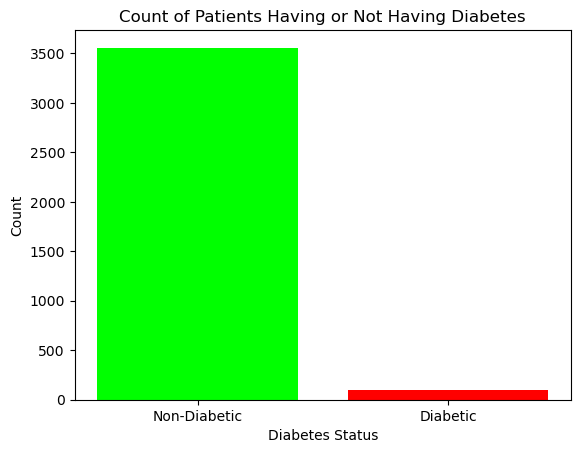

In [22]:
# Barchart for Patients Having Daibetes
x = ["Non-Diabetic","Diabetic"]
nd = d = 0
for i in df['diabetes']:
    if i==0:
        nd+=1
    else:
        d+=1
y = [nd,d]

plt.bar(x,y,color=['lime','red'])
plt.xlabel("Diabetes Status")
plt.ylabel("Count")
plt.title("Count of Patients Having or Not Having Diabetes")
plt.show()

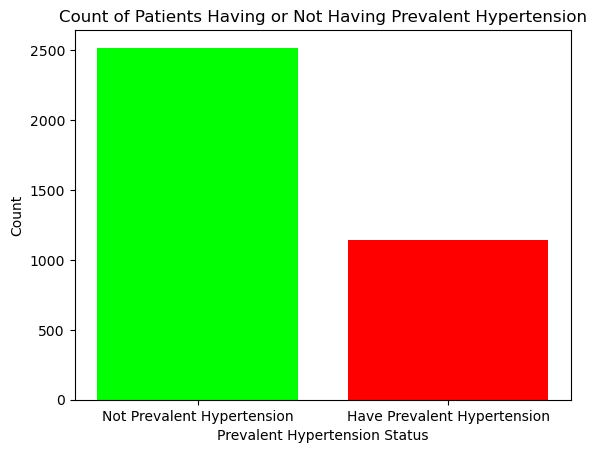

In [23]:
# Barchart for Patients Having Prevalent Hypertension
x = ["Not Prevalent Hypertension","Have Prevalent Hypertension"]
nph = ph = 0
for i in df['prevalentHyp']:
    if i==0:
        nph+=1
    else:
        ph+=1
y = [nph,ph]

plt.bar(x,y,color=['lime','red'])
plt.xlabel("Prevalent Hypertension Status")
plt.ylabel("Count")
plt.title("Count of Patients Having or Not Having Prevalent Hypertension")
plt.show()

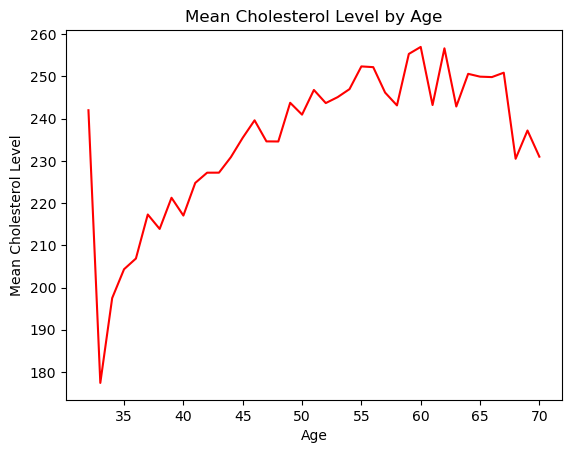

In [24]:
# Line Plot to Show Mean Cholesterol Level by Age
mean_cholesterol = df.groupby('age')['totChol'].mean()

plt.plot(mean_cholesterol.index, mean_cholesterol.values,color="red")
plt.xlabel('Age')
plt.ylabel('Mean Cholesterol Level')
plt.title('Mean Cholesterol Level by Age')
plt.show()

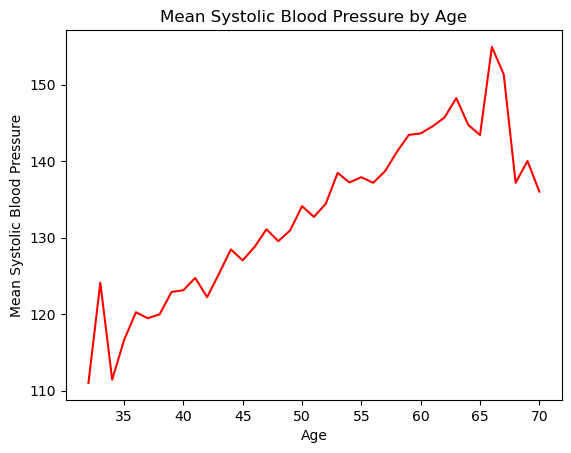

In [25]:
# Line Plot to Show Relationship Between Age And Systolic Blood Pressure
mean_SysBP = df.groupby('age')['sysBP'].mean()

plt.plot(mean_SysBP.index, mean_SysBP.values,color="red")
plt.xlabel('Age')
plt.ylabel('Mean Systolic Blood Pressure')
plt.title('Mean Systolic Blood Pressure by Age')
plt.show()


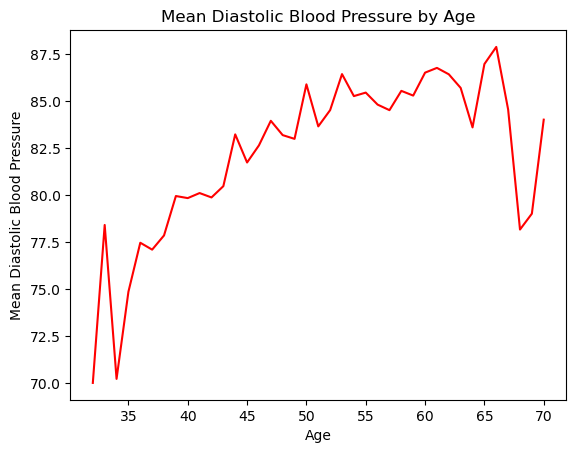

In [26]:
# Line Plot to Show Relationship Between Age And Diastolic Blood Pressure
mean_diaBP = df.groupby('age')['diaBP'].mean()

plt.plot(mean_diaBP.index, mean_diaBP.values,color="red")
plt.xlabel('Age')
plt.ylabel('Mean Diastolic Blood Pressure')
plt.title('Mean Diastolic Blood Pressure by Age')
plt.show()


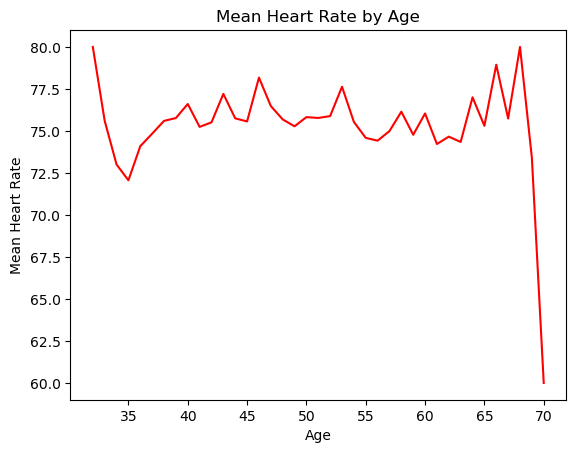

In [27]:
# Line Plot to Show Relationship Between Age And Heart Rate
mean_heartRate = df.groupby('age')['heartRate'].mean()

plt.plot(mean_heartRate.index, mean_heartRate.values,color="red")
plt.xlabel('Age')
plt.ylabel('Mean Heart Rate')
plt.title('Mean Heart Rate by Age')
plt.show()

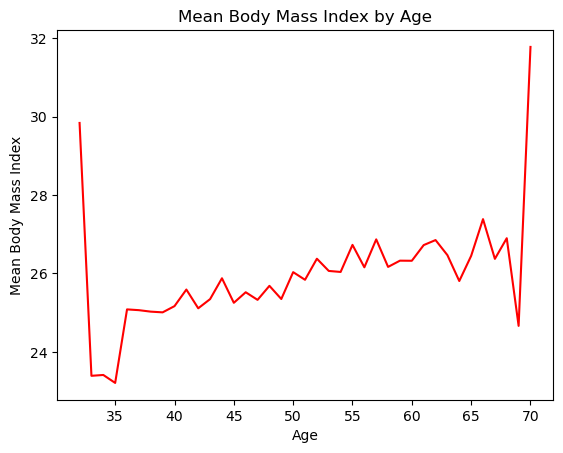

In [28]:
# Line Plot to Show Relationship Between Age And Body Mass Index
mean_BMI = df.groupby('age')['BMI'].mean()

plt.plot(mean_BMI.index, mean_BMI.values,color="red")
plt.xlabel('Age')
plt.ylabel('Mean Body Mass Index')
plt.title('Mean Body Mass Index by Age')
plt.show()


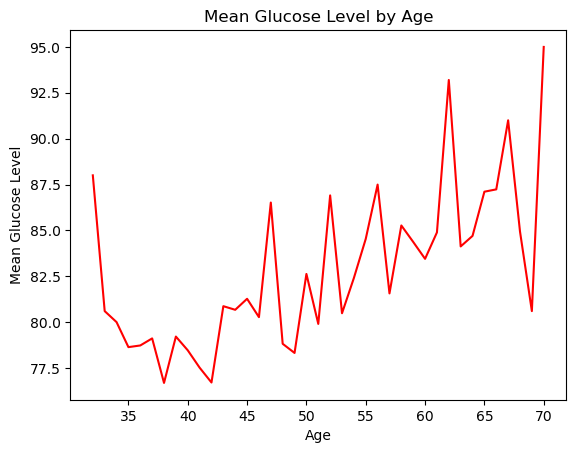

In [29]:
# Line Plot to Show Relationship Between Age And Glucose Level
mean_glucose = df.groupby('age')['glucose'].mean()

plt.plot(mean_glucose.index, mean_glucose.values,color="red")
plt.xlabel('Age')
plt.ylabel('Mean Glucose Level')
plt.title('Mean Glucose Level by Age')
plt.show()

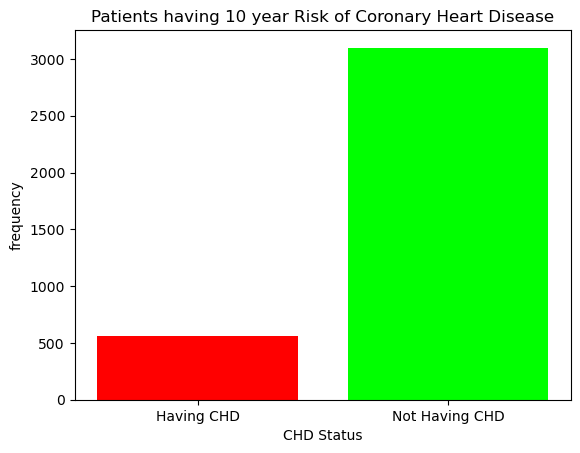

In [30]:
# Bar Graph for Patients having 10 year Risk of Coronary Heart Disease (CHD)
x = ['Having CHD','Not Having CHD']
nchd = chd = 0
for i in df['TenYearCHD']:
    if i == 1:
        chd += 1
    else:
        nchd += 1
y = [chd,nchd]

plt.bar(x,y,color=["red","lime"])
plt.xlabel("CHD Status")
plt.ylabel("frequency")
plt.title("Patients having 10 year Risk of Coronary Heart Disease")
plt.show()

In [31]:
###  Input and Output 

In [32]:
# Input  =  male, age, education, currentSmoker, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose.
# Output =  TenYearCHD
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [33]:
x  

array([[  1.  ,  39.  ,   4.  , ...,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  , ...,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  , ...,  25.34,  75.  ,  70.  ],
       ...,
       [  1.  ,  50.  ,   1.  , ...,  25.97,  66.  ,  86.  ],
       [  1.  ,  51.  ,   3.  , ...,  19.71,  65.  ,  68.  ],
       [  0.  ,  52.  ,   2.  , ...,  21.47,  80.  , 107.  ]])

In [34]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [35]:
###  Train and Test Variables

# test_size=.20 means data will split into 20% test and 80% train

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state = 0)

In [36]:
print(x_train.shape)  # 80% data
print(x_test.shape)   # 20% data

(2924, 15)
(732, 15)


In [37]:
print(y_train.shape)  # 80% data
print(y_test.shape)   # 20% data

(2924,)
(732,)


In [38]:
# As Dataset Has only 3% data of  CHD Patient so it can make model Lean towards Majority
# Here Majority is Patient not having CHD i.e 97%
# This means there is imbalance in dataset.
# So, using oversampling to overcome this
# Apply SMOTE oversampling

smote = SMOTE()
x_train_oversampled, y_train_oversampled = smote.fit_resample(x_train, y_train)

In [39]:
# Running Regressor

model = LogisticRegression(max_iter=10000)

In [40]:
# Fit Model

model.fit(x_train_oversampled, y_train_oversampled)

LogisticRegression(max_iter=10000)

In [41]:
# Predict the Output

y_pred = model.predict(x_test)

In [42]:
# Predicted Output 

y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,

In [43]:
# Actual Output

y_test

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [44]:
### Evaluation of Model

In [45]:
# Accuracy of Model

acc =  accuracy_score(y_test,y_pred) * 100
print("Accuracy of Model is :: ",format(acc,'.2f'),"%")

Accuracy of Model is ::  66.53 %


In [46]:
# Calculate precision, recall, F1-score, and support

report = classification_report(y_test, y_pred)  # Calculate precision, recall, F1-score, and support
print(report)

              precision    recall  f1-score   support

           0       0.92      0.66      0.77       623
           1       0.26      0.67      0.37       109

    accuracy                           0.67       732
   macro avg       0.59      0.67      0.57       732
weighted avg       0.82      0.67      0.71       732



In [47]:
# Calculating AUC-ROC Score
# It show the model's ability to distinguish between positive and negative instances across different probability thresholds.
# It ranges b/w 0 to 1

auc_roc = roc_auc_score(y_test, y_pred)
print("AUC-ROC Score: {:.2f}".format(auc_roc))

AUC-ROC Score: 0.67


In [48]:
'''
 A score of 0.69 suggests that our model has some discriminative power
 between positive and negative instances.
'''

'\n A score of 0.69 suggests that our model has some discriminative power\n between positive and negative instances.\n'

<Axes: >

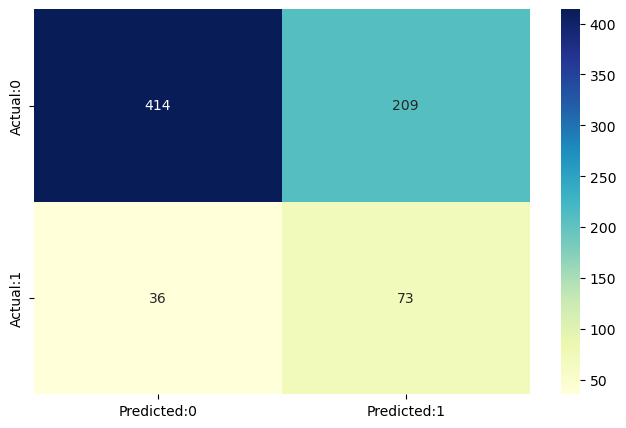

In [49]:
# Confusion Matrix

import seaborn as sn
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [50]:
### Predicting Random Input

pred = model.predict([[1, 55, 2, 1, 20, 1, 0, 1, 0, 250, 140, 90, 30, 70, 120]])
pred 

array([1])

In [51]:
pred = model.predict([[0,43,2,0,0,0,0,1,0,228,180,110,30.3,77,99]])
pred

array([0])

In [52]:
'''
Thus The Model Able To Predict Heart Disease with
Accuracy   67.76%
Precesion  0.93
Recall     0.70
F1 Score   0.78
ACU-Score  0.69
'''

'\nThus The Model Able To Predict Heart Disease with\nAccuracy   67.76%\nPrecesion  0.93\nRecall     0.70\nF1 Score   0.78\nACU-Score  0.69\n'

In [53]:
'''
Model demonstrates the ability to predict heart disease with a moderate level of accuracy (67.76%). It exhibitsa high precision of 0.93, indicating that when it predicts a patient as having heart disease, it is correct approximately 93% of the time. The recall score of 0.70 highlights the model's effectiveness in identifyingpositive instances. Additionally, the F1 score of 0.78 indicates a balanced performance between precision and recall.Lastly, the AUC score of 0.69 reflects the model's capability to distinguish between positive and negative instances. While there is room for improvement, these metrics suggest that your model shows promise in predicting heart disease.
'''

"\nModel demonstrates the ability to predict heart disease with a moderate level of accuracy (67.76%). It exhibitsa high precision of 0.93, indicating that when it predicts a patient as having heart disease, it is correct approximately 93% of the time. The recall score of 0.70 highlights the model's effectiveness in identifyingpositive instances. Additionally, the F1 score of 0.78 indicates a balanced performance between precision and recall.Lastly, the AUC score of 0.69 reflects the model's capability to distinguish between positive and negative instances. While there is room for improvement, these metrics suggest that your model shows promise in predicting heart disease.\n"